In [ ]:
#Este es el proyecto de los cuerpos de agua. Lo primero que he tenido que hacer es
#darme de alta en Kaggle para poder acceder a los datos
#No he podido dar con la documentación de los participantes anteriores, ya sea de
#ganadores o de cualquier otro participante
#De todas maneras, lo primero que hay que hacer es familiarizase con el tipo de datos
#a manejar. Intuitivamente me espero que:

#Las cataratas y los ríos se vean afectados mucho más claramente o de forma más inmediata
#por las lluvias/ausencia de lluvias que los lagos y los acuíferos. Va a ser importante
#comprobar cuánta información contienen los datasets con respecto a lluvias, nevadas etc
#Especialmente en los ds de cataratas y ríos. Si no hubiera, me aproximaré al problema
#atendiendo a la época del año, localicación geográfica etc, que son más generales pero
#también fiables

#Dejo aquí esta frase para recordarme hacer alguna prueba rápida e investigar si unos
#correlacionan con otros de manera significativa e insospechada. Es verdad que en la
#competición piden modelos independientes para cada tipo, pero tal vez pueda usar
#algún tipo de cruce de datos para mejorar un modelo con el que no esté muy satisfecho
#si es que lo hay. Lo más seguro es que no correlacionen tanto
#SPOILER. Ya he investigado esta cuestión y solamente correlacionan en la ganancia
#de agua, que tiene que ver con las lluvias, pero no en las pérdidas porque eso depende
#también de la interacción humana con cada cuerpo de agua

In [ ]:
#Viendo el ds del río Arno me encuentro con que tenemos datos de precipitaciones
#Esto es una gran noticia porque es información muy útil. La contraparte es que
#no hay ningún tipo de medición en relación con el caudal. Es decir, me va a tocar
#inferir el caudal del río en base a las precipitaciones (cuyas medidas ni siquiera
#están tomadas sobre el río sino sobre zonas cercanas)

#El modelo para el río tiene pinta de que va a ser complejo tanto por la variabilidad
#de caudal de los ríos como por la ausencia de datos directos del caudal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8217 entries, 1998-01-01 to 2020-06-30
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rainfall_Le_Croci          6026 non-null   float64
 1   Rainfall_Cavallina         6026 non-null   float64
 2   Rainfall_S_Agata           6026 non-null   float64
 3   Rainfall_Mangona           6026 non-null   float64
 4   Rainfall_S_Piero           6026 non-null   float64
 5   Rainfall_Vernio            4283 non-null   float64
 6   Rainfall_Stia              1283 non-null   float64
 7   Rainfall_Consuma           1283 non-null   float64
 8   Rainfall_Incisa            4568 non-null   float64
 9   Rainfall_Montevarchi       1647 non-null   float64
 10  Rainfall_S_Savino          1283 non-null   float64
 11  Rainfall_Laterina          1283 non-null   float64
 12  Rainfall_Bibbiena          2378 non-null   float64
 13  Rainfall_Camaldoli         128

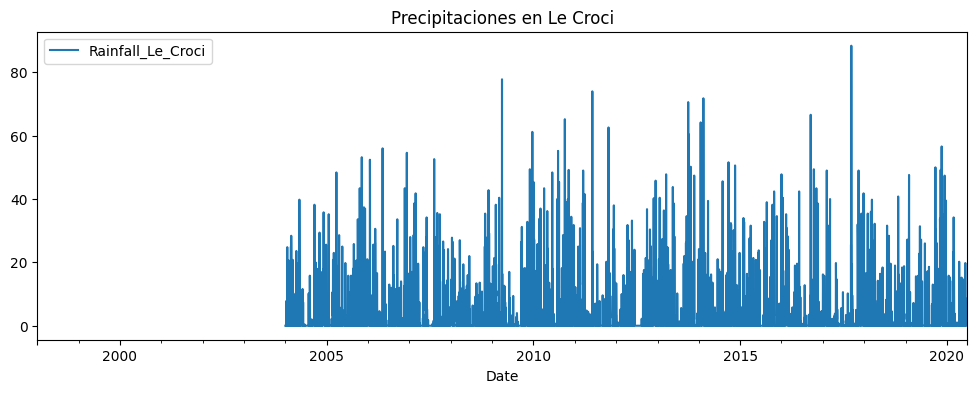

In [6]:
df = pd.read_csv("River_Arno.csv")
#Hay que indicarle el formato correcto de d/m/Y para que no de error
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)

print(df.info())
print(df.isnull().mean())

#Sacamos un primer plot con las precipitaciones para ver qué aspecto tiene
df.plot(y='Rainfall_Le_Croci', figsize=(12,4), title='Precipitaciones en Le Croci')
plt.show()

#Podemos ver que a mediados de todos los años las precipitaciones bajan. Además de
#esto y de que parece que ha habido lluvias más extremas recientemente (lo cual pueden
#ser fluctuaciones aleatorias), es difícil hacer más valoraciones en este formato
#Voy a agrupar por meses del año y a sacar la media para cada uno según la zona para
#ver si es más fácil distinguir patrones

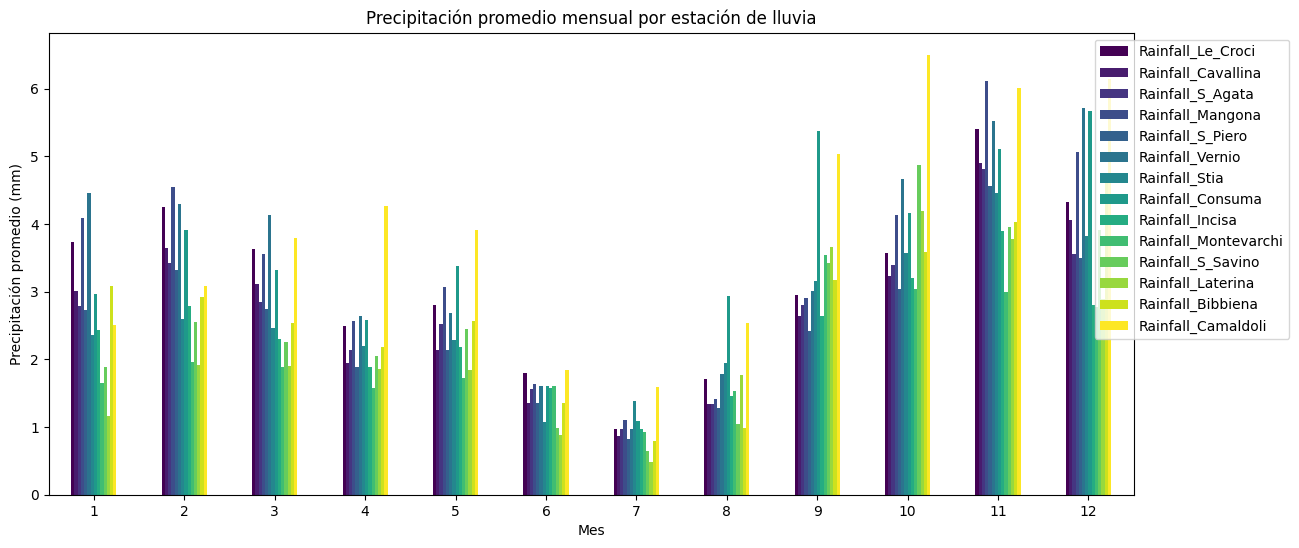

In [7]:
df = pd.read_csv('River_Arno.csv')


df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

df['Month'] = df.index.month

#Nos quedamos solo con las columnas de precipitaciones y sacamos la media
rain_columns = [col for col in df.columns if 'Rainfall' in col]
monthly_avg = df.groupby('Month')[rain_columns].mean()

#Ploteamos agrupando por meses del año (y por zonas dentro de cada mes)
monthly_avg.plot(kind='bar', figsize=(14,6), colormap='viridis')
plt.title('Precipitación promedio mensual por estación de lluvia')
plt.ylabel('Precipitación promedio (mm)')
plt.xlabel('Mes')
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

#Esto ya es otra cosa. Ahora sí se puede apreciar claramente una tendencia mensual:
#como es habitual en países del sur de europa, junio, julio y agosto son los
#meses menos lluviosos, mientras que noviembre y diciembre son los que más precipitaciones
#tienen (tal vez se cuenten aquí las nevadas también). Además, se aprecia que hay zonas
#claramente más lluviosas que otras durante la mayoría del año, como Camaldoni.


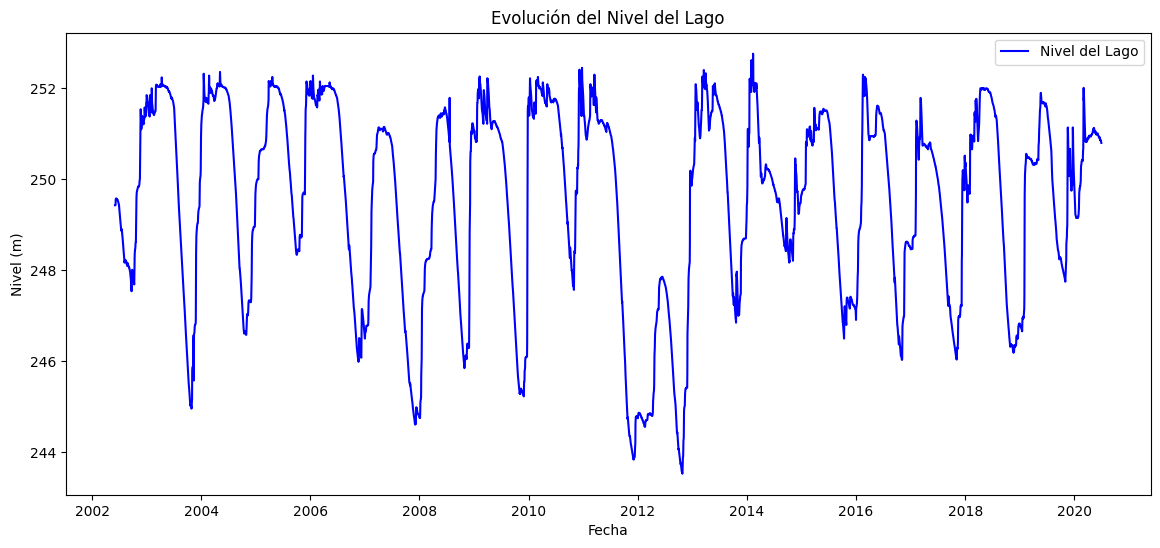

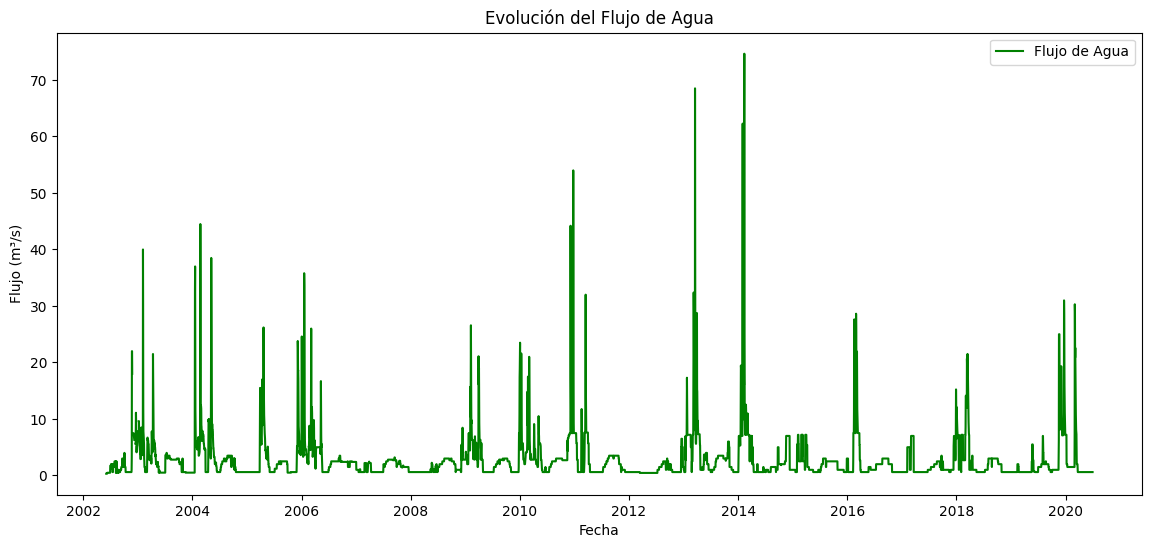

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Lake_Bilancino.csv')

#Paso date a datetime y eliminar NaNs
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

#Graficar
plt.figure(figsize=(14,6))
plt.plot(df['Lake_Level'], label="Nivel del Lago", color='blue')
plt.title("Evolución del Nivel del Lago")
plt.xlabel("Fecha")
plt.ylabel("Nivel (m)")
plt.legend()
plt.show()

#Lo mismo para el flujo del agua
plt.figure(figsize=(14,6))
plt.plot(df['Flow_Rate'], label="Flujo de Agua", color='green')
plt.title("Evolución del Flujo de Agua")
plt.xlabel("Fecha")
plt.ylabel("Flujo (m³/s)")
plt.legend()
plt.show()


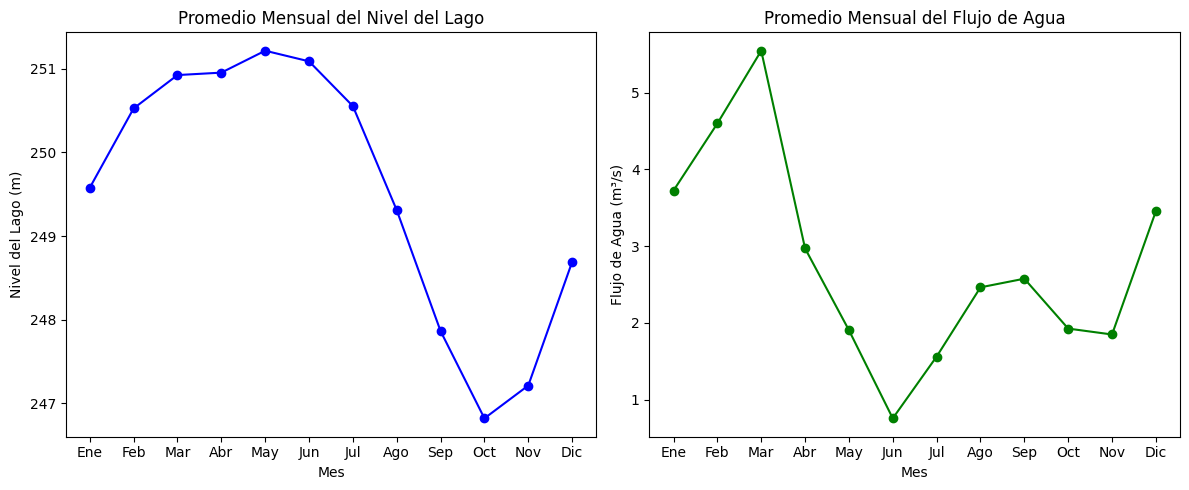

In [ ]:
df = df.reset_index()

df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

#Creo las columnas por meses y saco el promedio mensual para ver el patrón general
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')[['Lake_Level', 'Flow_Rate']].mean()

#Vamos a ver tanto el nivel del lago como el flujo de agua
plt.figure(figsize=(12,5))

#Nivel lago
plt.subplot(1,2,1)
plt.plot(monthly_avg.index, monthly_avg['Lake_Level'], marker='o', linestyle='-', color='blue')
plt.title("Promedio Mensual del Nivel del Lago")
plt.xlabel("Mes")
plt.ylabel("Nivel del Lago (m)")
plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

#Flujo agua
plt.subplot(1,2,2)
plt.plot(monthly_avg.index, monthly_avg['Flow_Rate'], marker='o', linestyle='-', color='green')
plt.title("Promedio Mensual del Flujo de Agua")
plt.xlabel("Mes")
plt.ylabel("Flujo de Agua (m³/s)")
plt.xticks(range(1,13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.tight_layout()
plt.show()

#Bien, aquí nos encontramos una gráfica muy fácil de interpretar (la del promedio mensual
#del nivel del lago) y otra con un comportamiento algo más misterioso

#Podemos ver que el promedio mensual del nivel del lago va fluctuando entre los 247
#y los 251 m a lo largo del año de una manera bastante gradual

#Lo chocante es el bache que aparece en la gráfica de promedio mensual del flujo de
#agua. Concretamente entre julio y octubre.

#Voy a aumentar la resolución (a tomar cada día en lugar de cada mes) para que la gráfica
#sea un poco menos smooth con idea de ver algún otro patrón


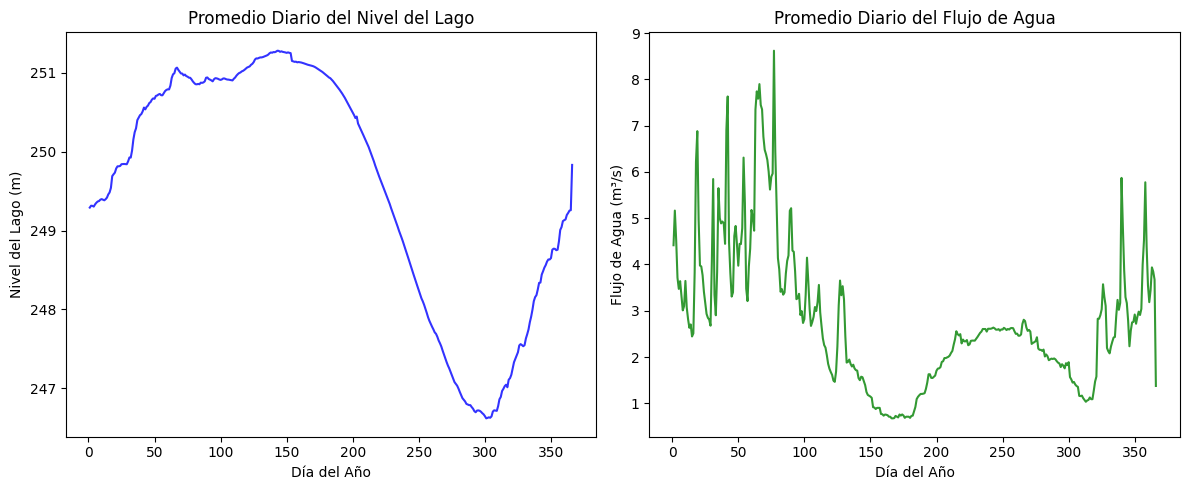

In [ ]:
df = df.reset_index()

df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df['Day_of_Year'] = df.index.dayofyear

#Hacemos groupby por día del año
daily_avg = df.groupby('Day_of_Year')[['Lake_Level', 'Flow_Rate']].mean()


plt.figure(figsize=(12,5))

#Nivel lago
plt.subplot(1,2,1)
plt.plot(daily_avg.index, daily_avg['Lake_Level'], color='blue', alpha=0.8)
plt.title("Promedio Diario del Nivel del Lago")
plt.xlabel("Día del Año")
plt.ylabel("Nivel del Lago (m)")

#Flujo agua
plt.subplot(1,2,2)
plt.plot(daily_avg.index, daily_avg['Flow_Rate'], color='green', alpha=0.8)
plt.title("Promedio Diario del Flujo de Agua")
plt.xlabel("Día del Año")
plt.ylabel("Flujo de Agua (m³/s)")

plt.tight_layout()
plt.show()

#Ahora podemos confirmar un par de cosas. La primera es que la gráfica del nivel del
#lago no tiene cambios drásticos en ningún momento, lo cual tiene mucho sentido, ya
#que incluso vaciarlo es un proceso lento.
#Además, vemos que los meses con más lluvias en los gráficos anteriores eran los de
#noviembre y diciembre, aunque también encontrábamos un nivel bueno de lluvias en los
#primeros meses del año
#Aquí tenemos una gráfica en la que el nivel del lago tiene un cierto desfase temporal
#con respecto a las otras lluvias. Lo cual tiene bastante sentido ten

#Investigando acerca del lago he encontrado que en realidad el nivel del lago en m
#(esos 251m que aparecen como máximo) no son la distancia al punto más profundo del
#lago, sino la elevación sobre el nivel del mar. El Bilacino tiene 31 metros de profundidad
#máxima. Ahora este rango de 4-5 metros entre los 246 y 251 es mucho más significativo
#en cuanto a la capacidad total del lago.

#Por otra parte, con respecto al flujo de agua, observamos que hay un patrón muy irregular
#de flujo de agua al inicio del año. Tiene pinta de ser la intervención humanda tratando
#de mantener los niveles del lago para compensar los momentos de más lluvias y evitar
#que se desborde

#Por último, se puede ver que el patrón de la "colina" en la gráfica que va del día
#180 al día 315 aprox es mucho menos escalonada. Da la impresión de que tiene que ver
#con un factor mucho más controlado o más previsible que unas lluvias a compensar.

#Efectivamente! He estado investigando y la vendimia de uvas (hay muchos vinos de la
#Toscana) es a finales de agosto/octubre
#La cosecha del olivo va desde junio hasta octubre (están listas para octubre)
#El girasol se siembra en primavera y se cosecha entre julio y septiembre

#Es muy probable o al menos tiene toda la pinta de tener que ver con la agricultura
#Es un patrón mucho más estable que el de las lluvias, predecible y simétrico, como
#si se estuviera destinando parte del agua de este lago a regar cultivos a principios
#de otoño/finales de verano


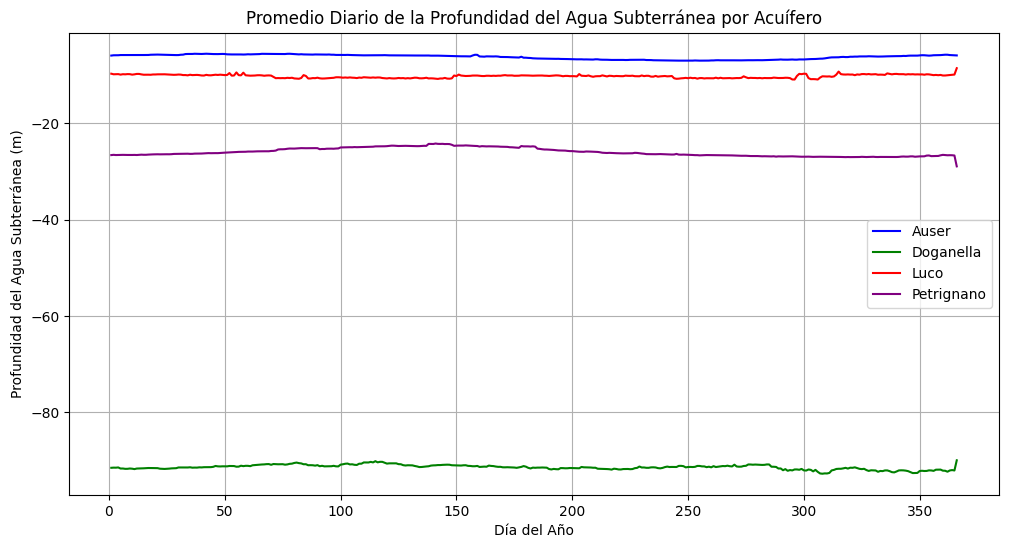

In [ ]:
#Pasemos a los acuíferos

import pandas as pd
import matplotlib.pyplot as plt

#Voy a sacarlos todos juntos para ser si se aprecia algún tipo de correlación entre
#ellos. Si no la encuentro, pasaré a
# Lista de archivos y nombres de los acuíferos
aquifers = {
    "Auser": "Aquifer_Auser.csv",
    "Doganella": "Aquifer_Doganella.csv",
    "Luco": "Aquifer_Luco.csv",
    "Petrignano": "Aquifer_Petrignano.csv"
}

# Colores para las gráficas
colors = ["blue", "green", "red", "purple"]

plt.figure(figsize=(12, 6))

# Iterar sobre cada acuífero
for i, (name, file) in enumerate(aquifers.items()):
    # Cargar datos
    df = pd.read_csv(file) # Remove parse_dates argument here

    # Convertir la columna 'Date' a datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y') # Explicitly convert to datetime

    # Extraer día del año
    df["DayOfYear"] = df["Date"].dt.dayofyear

    # Identificar columnas de profundidad (que empiezan con 'Depth')
    depth_cols = [col for col in df.columns if "Depth_to_Groundwater" in col]

    if not depth_cols:
        print(f"No se encontraron columnas de profundidad en {name}")
        continue

    # Calcular el promedio diario
    df_mean = df.groupby("DayOfYear")[depth_cols].mean()

    # Graficar
    plt.plot(df_mean.index, df_mean.mean(axis=1), label=name, color=colors[i])

plt.xlabel("Día del Año")
plt.ylabel("Profundidad del Agua Subterránea (m)")
plt.title("Promedio Diario de la Profundidad del Agua Subterránea por Acuífero")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Desgraciadamente en el gráfico anterior tampoco podemos visualizar nada con claridad
#Hay algunos picos bastante marcados que bien pueden ser valores extremos reales o
#simplemente valores faltantes. Los saco uno por uno


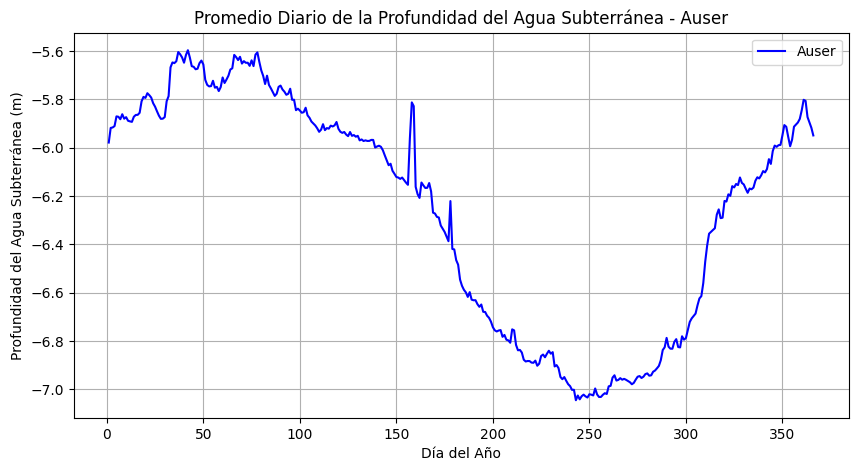

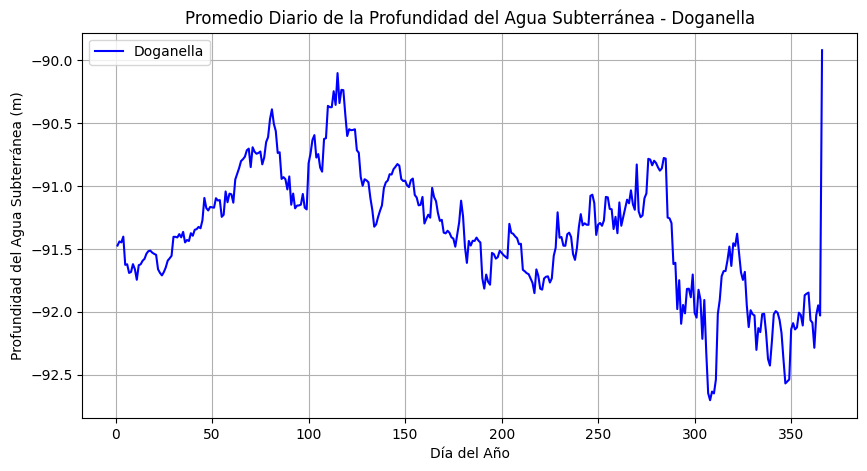

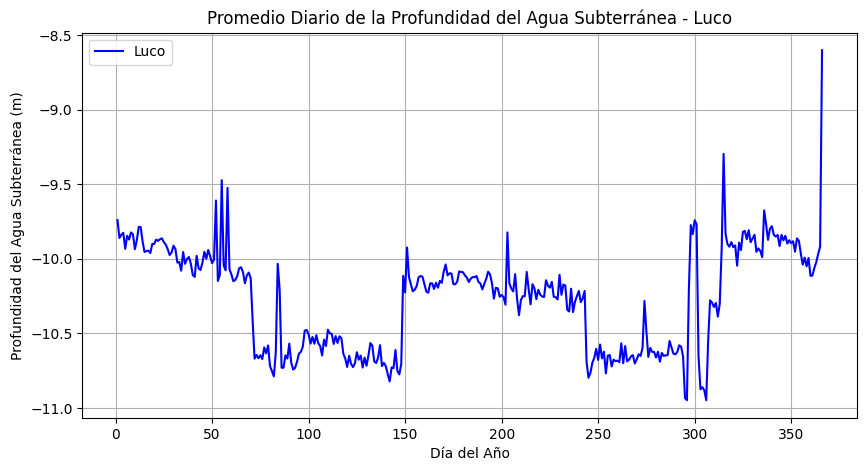

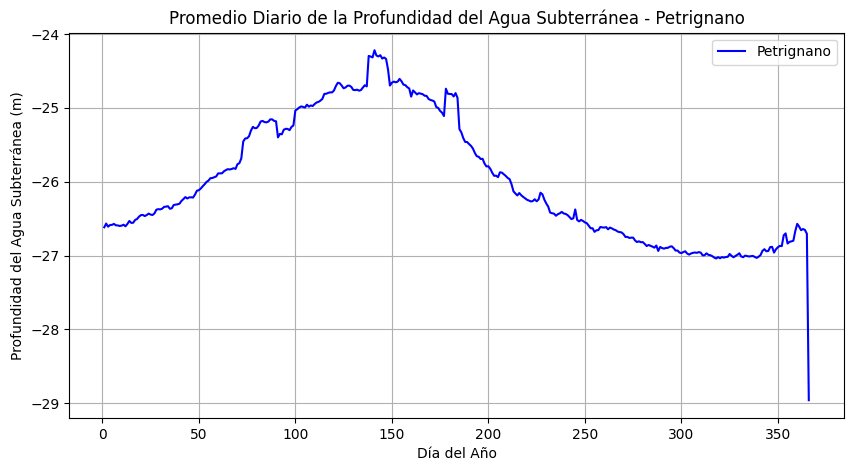

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Lista de archivos y nombres de los acuíferos
aquifers = {
    "Auser": "Aquifer_Auser.csv",
    "Doganella": "Aquifer_Doganella.csv",
    "Luco": "Aquifer_Luco.csv",
    "Petrignano": "Aquifer_Petrignano.csv"
}

#Saco cada acuífero por separado
for name, file in aquifers.items():
    df = pd.read_csv(file)

    # Convertir la columna 'Date' a formato datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')

    # Extraer el día del año
    df["DayOfYear"] = df["Date"].dt.dayofyear

    # Identificar columnas de profundidad del agua subterránea
    depth_cols = [col for col in df.columns if "Depth_to_Groundwater" in col]

    if not depth_cols:
        print(f"No se encontraron columnas de profundidad en {name}")
        continue

    # Calcular el promedio diario
    df_mean = df.groupby("DayOfYear")[depth_cols].mean()

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(df_mean.index, df_mean.mean(axis=1), label=name, color="blue")
    plt.xlabel("Día del Año")
    plt.ylabel("Profundidad del Agua Subterránea (m)")
    plt.title(f"Promedio Diario de la Profundidad del Agua Subterránea - {name}")
    plt.legend()
    plt.grid()
    plt.show()


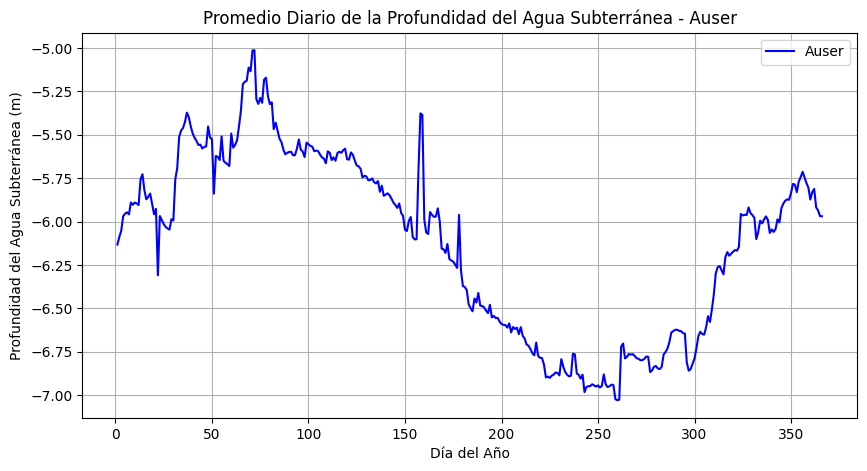

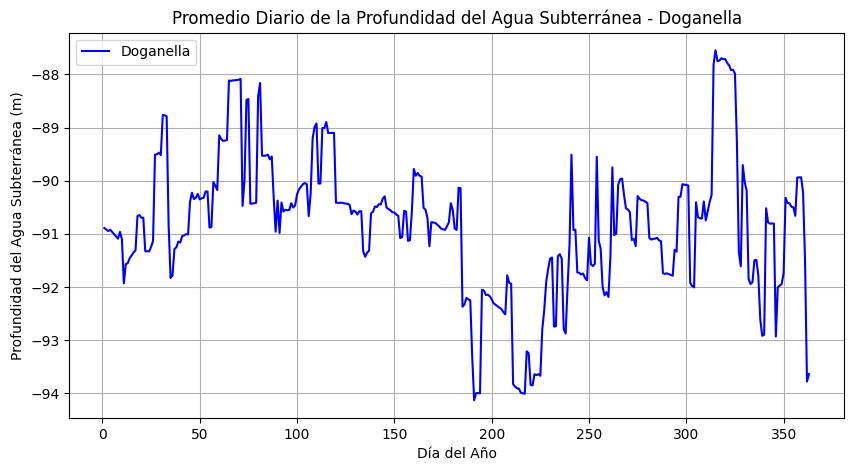

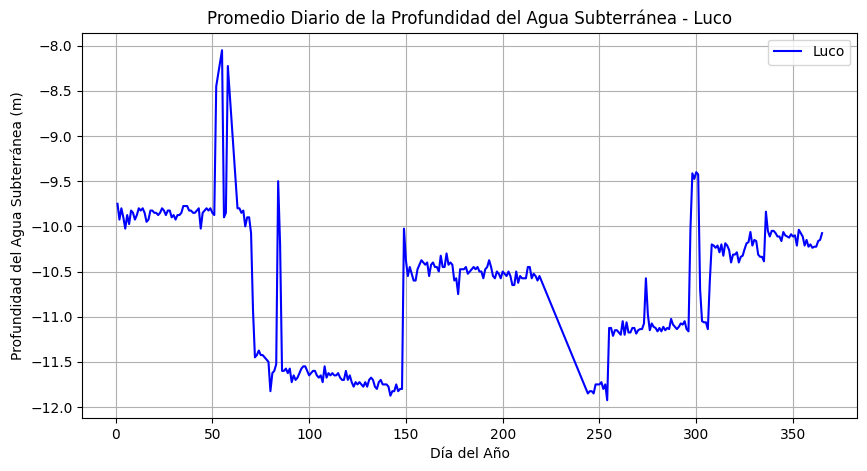

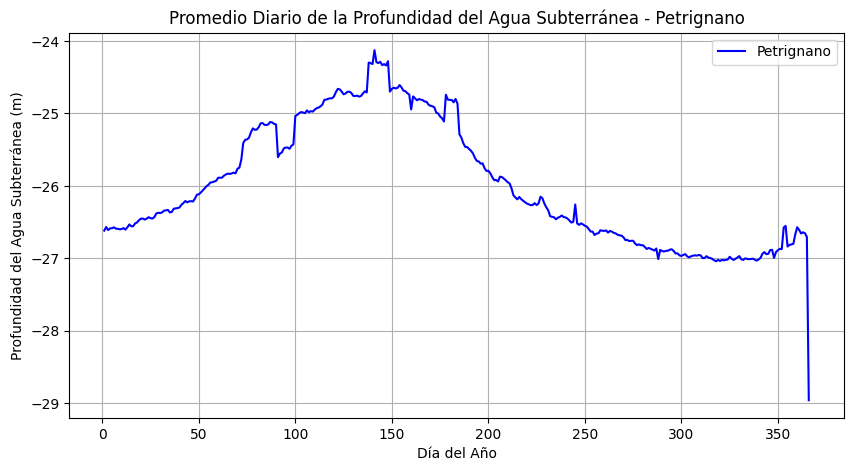

In [ ]:
#Ahora hay que pasar a rellenar los valores faltantes. Antes de eso voy a plotear
#la media de cada acuífero según el día del año para tener una idea de cómo se comportan

import pandas as pd
import matplotlib.pyplot as plt

#De nuevo la lista con los nombres
aquifers = {
    "Auser": "Aquifer_Auser.csv",
    "Doganella": "Aquifer_Doganella.csv",
    "Luco": "Aquifer_Luco.csv",
    "Petrignano": "Aquifer_Petrignano.csv"
}

#Y sacar cada acuífero
for name, file in aquifers.items():
    df = pd.read_csv(file)

    # Convertir la columna 'Date' a formato datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')

    # Extraer el día del año
    df["DayOfYear"] = df["Date"].dt.dayofyear

    # Identificar columnas de profundidad del agua subterránea
    depth_cols = [col for col in df.columns if "Depth_to_Groundwater" in col]

    if not depth_cols:
        print(f"⚠️ No se encontraron columnas de profundidad en {name}")
        continue

    # Eliminar filas con NaN antes de calcular el promedio
    df_clean = df.dropna(subset=depth_cols)

    # Calcular el promedio diario sin NaN
    df_mean = df_clean.groupby("DayOfYear")[depth_cols].mean()

    # Graficar
    plt.figure(figsize=(10, 5))
    plt.plot(df_mean.index, df_mean.mean(axis=1), label=name, color="blue")
    plt.xlabel("Día del Año")
    plt.ylabel("Profundidad del Agua Subterránea (m)")
    plt.title(f"Promedio Diario de la Profundidad del Agua Subterránea - {name}")
    plt.legend()
    plt.grid()
    plt.show()


#Podemos ver de nuevo que hay outliers y que en ciertos días del año, como año nuevo,
#carecen sistemáticamente de datos

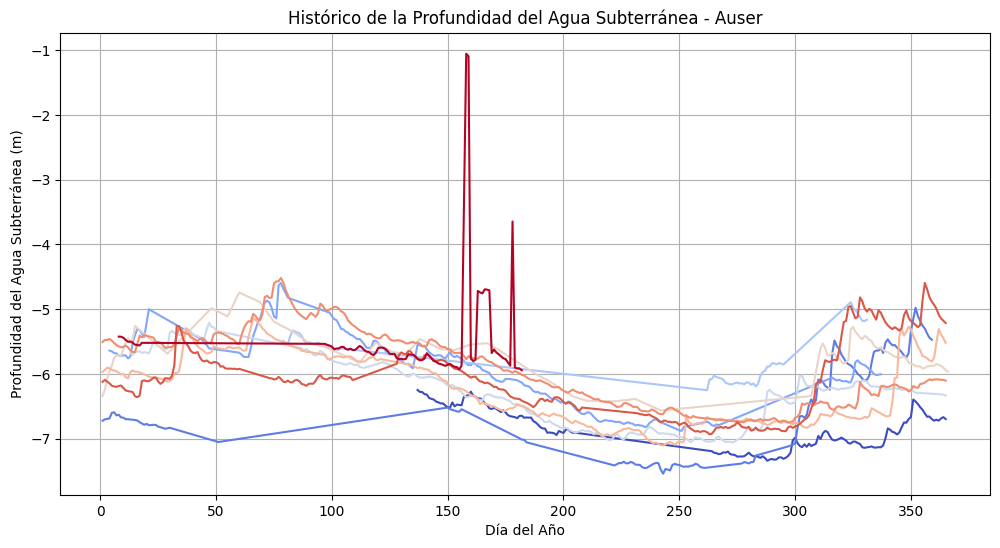

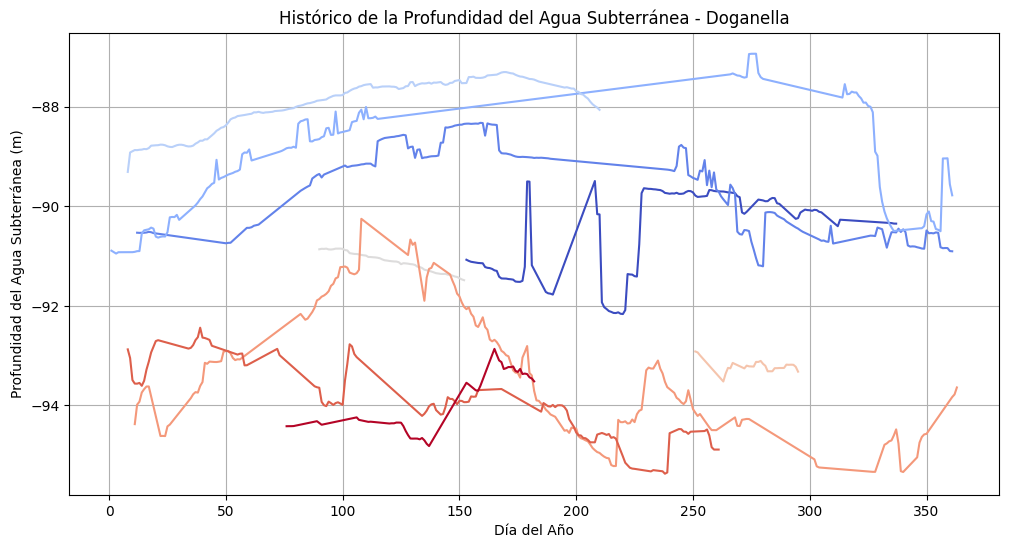

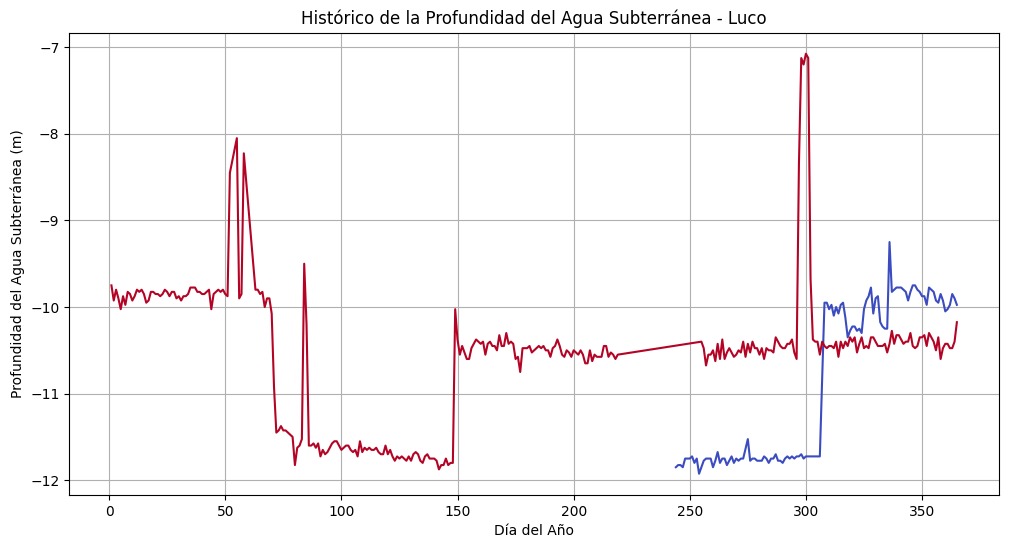

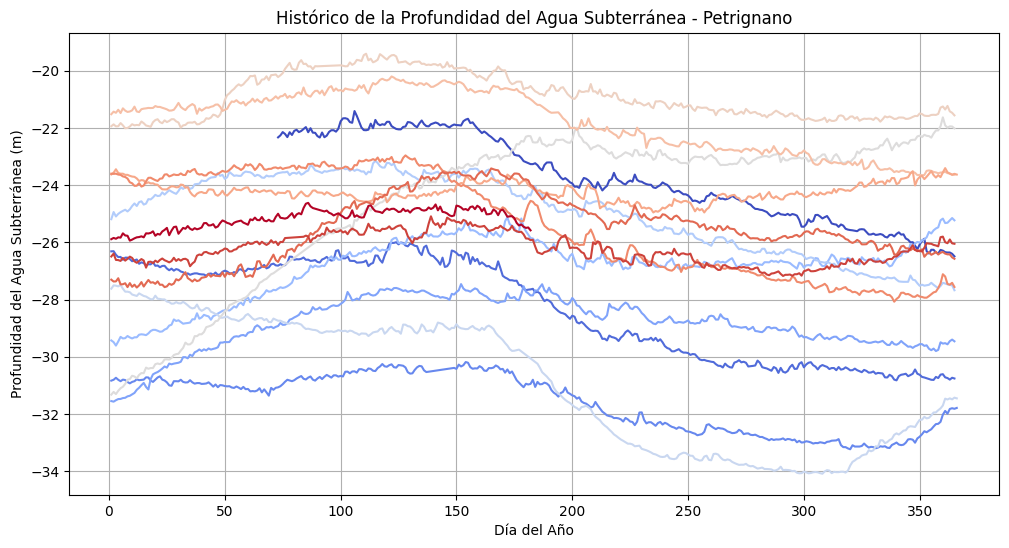

In [ ]:
#Además de esto, tenemos que analizar los distintos parámetros dentro de cada grupo
#en este caso, los acuíferos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de archivos y nombres de los acuíferos
aquifers = {
    "Auser": "Aquifer_Auser.csv",
    "Doganella": "Aquifer_Doganella.csv",
    "Luco": "Aquifer_Luco.csv",
    "Petrignano": "Aquifer_Petrignano.csv"
}

# Iterar sobre cada acuífero
for name, file in aquifers.items():
    df = pd.read_csv(file)

    # Convertir la columna 'Date' a formato datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')

    # Extraer año y día del año
    df["Year"] = df["Date"].dt.year
    df["DayOfYear"] = df["Date"].dt.dayofyear

    # Identificar columnas de profundidad
    depth_cols = [col for col in df.columns if "Depth_to_Groundwater" in col]

    if not depth_cols:
        print(f"No se encontraron columnas de profundidad en {name}")
        continue

    # Eliminar filas con NaN en las columnas de profundidad
    df_clean = df.dropna(subset=depth_cols)

    # Graficar el histórico
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_clean, x="DayOfYear", y=df_clean[depth_cols].mean(axis=1), hue="Year", palette="coolwarm", legend=False)
    plt.xlabel("Día del Año")
    plt.ylabel("Profundidad del Agua Subterránea (m)")
    plt.title(f"Histórico de la Profundidad del Agua Subterránea - {name}")
    plt.grid()
    plt.show()


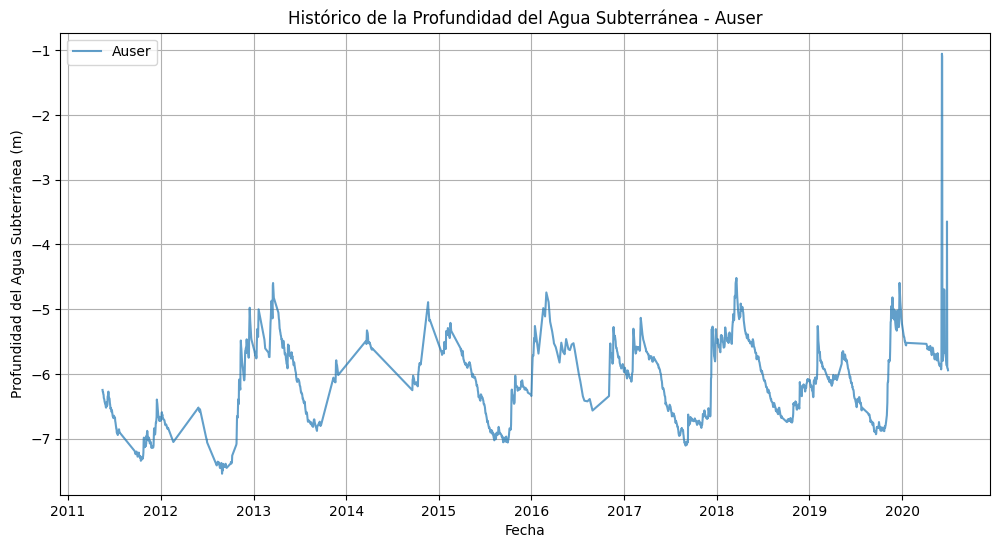

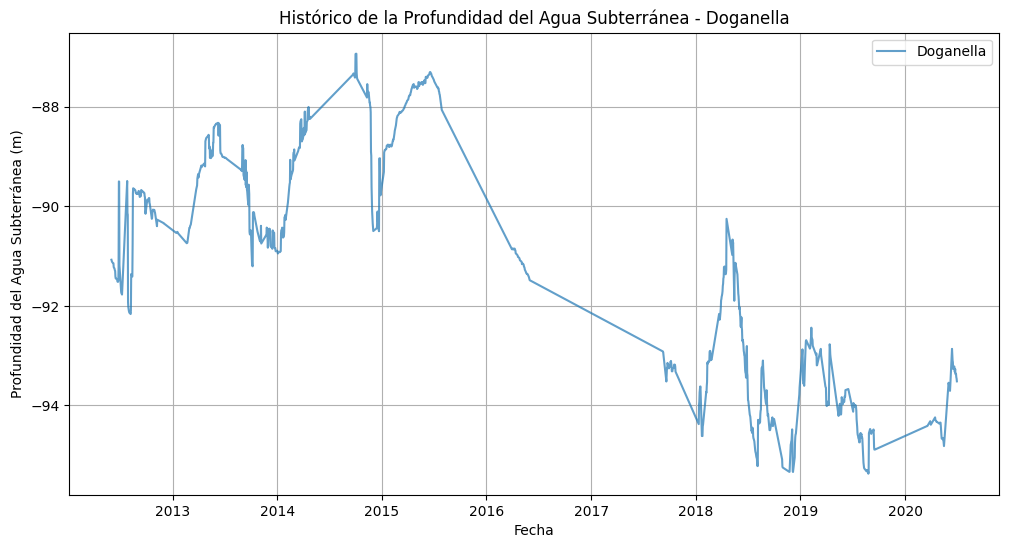

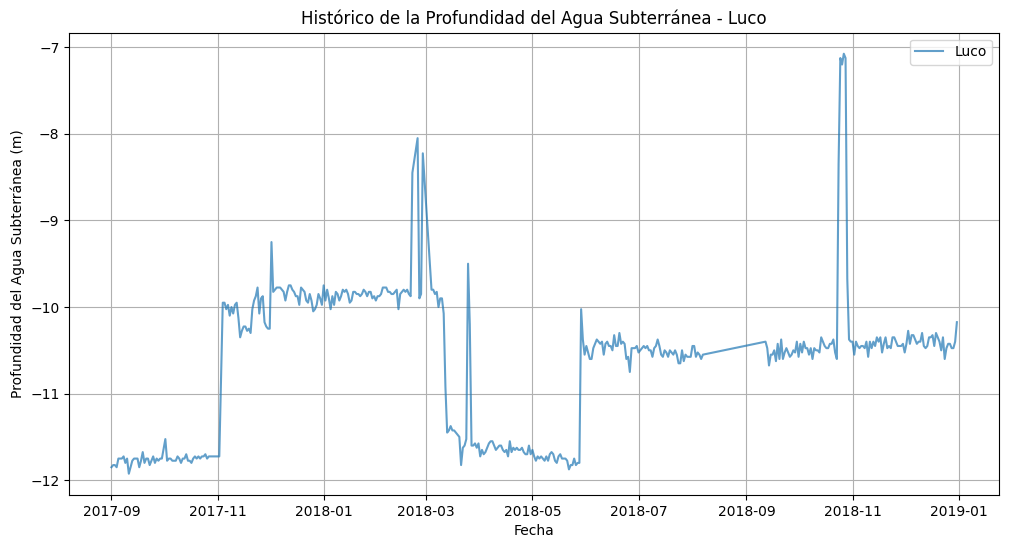

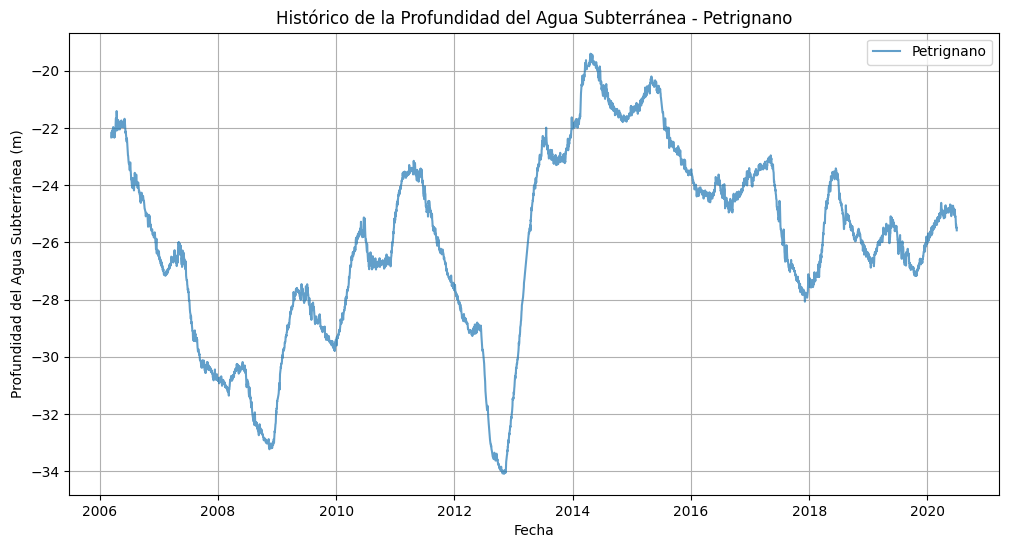

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de archivos y nombres de los acuíferos
aquifers = {
    "Auser": "Aquifer_Auser.csv",
    "Doganella": "Aquifer_Doganella.csv",
    "Luco": "Aquifer_Luco.csv",
    "Petrignano": "Aquifer_Petrignano.csv"
}

# Iterar sobre cada acuífero
for name, file in aquifers.items():
    df = pd.read_csv(file)

    # Convertir la columna 'Date' a formato datetime
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')

    # Identificar columnas de profundidad
    depth_cols = [col for col in df.columns if "Depth_to_Groundwater" in col]

    if not depth_cols:
        print(f"No se encontraron columnas de profundidad en {name}")
        continue

    # Eliminar filas con NaN en las columnas de profundidad
    df_clean = df.dropna(subset=depth_cols)

    # Graficar el histórico en el tiempo continuo
    plt.figure(figsize=(12, 6))
    plt.plot(df_clean["Date"], df_clean[depth_cols].mean(axis=1), label=name, alpha=0.7)
    plt.xlabel("Fecha")
    plt.ylabel("Profundidad del Agua Subterránea (m)")
    plt.title(f"Histórico de la Profundidad del Agua Subterránea - {name}")
    plt.legend()
    plt.grid()
    plt.show()

    #Esto está mejor


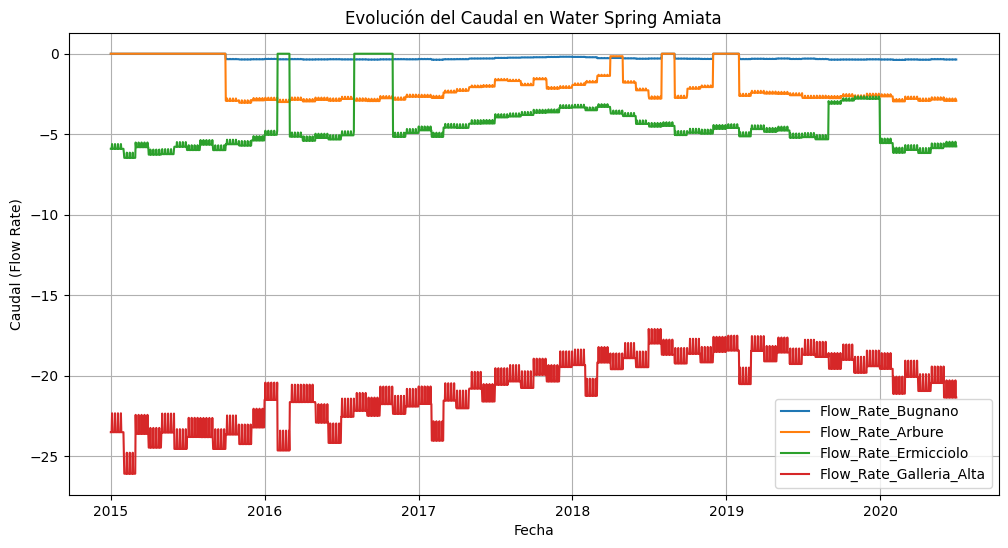

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo
file_path = "Water_Spring_Amiata.csv"

# Cargar datos
df = pd.read_csv(file_path)

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')

# Identificar columnas de caudal (Flow Rate)
flow_rate_cols = [col for col in df.columns if "Flow_Rate" in col]

# Verificar si hay columnas de caudal
if not flow_rate_cols:
    print("⚠️ No se encontraron columnas de caudal en el archivo.")
else:
    # Graficar cada caudal
    plt.figure(figsize=(12, 6))
    for col in flow_rate_cols:
        sns.lineplot(x=df['Date'], y=df[col], label=col)

    plt.xlabel("Fecha")
    plt.ylabel("Caudal (Flow Rate)")
    plt.title("Evolución del Caudal en Water Spring Amiata")
    plt.legend()
    plt.grid()
    plt.show()


#Da la impresión de que hay muchos valores faltantes. Para que el programa pueda funcionar
#y devolver los datos más precisos posibles, lo mejor será tomar uno en concreto


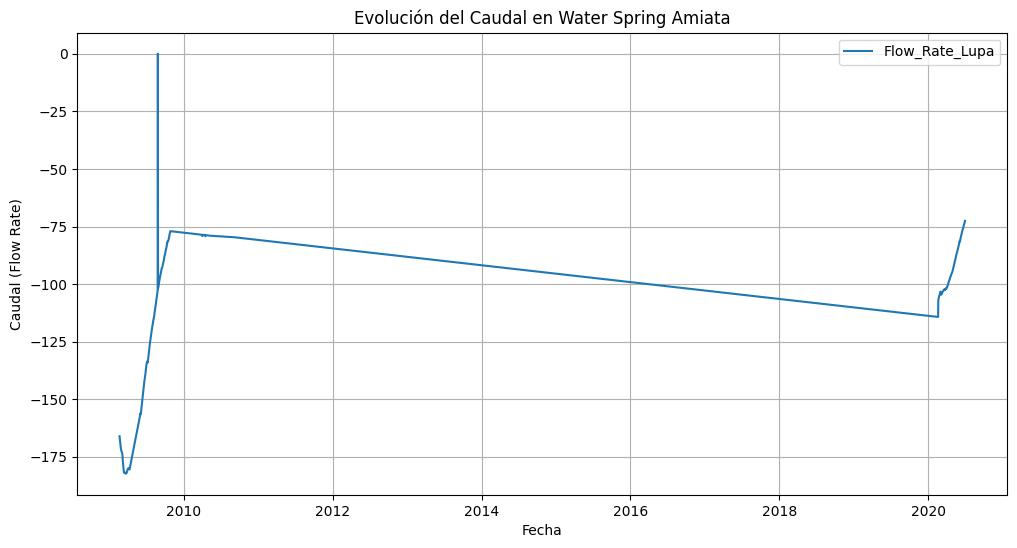

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Water_Spring_Lupa.csv"
df = pd.read_csv(file_path)

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')

#Aíslo las columnas del caudal, flow rate
flow_rate_cols = [col for col in df.columns if "Flow_Rate" in col]

# Verificar si hay columnas de caudal
if not flow_rate_cols:
    print("No se encontraron columnas de caudal en el archivo.")
else:
    # Graficar cada caudal
    plt.figure(figsize=(12, 6))
    for col in flow_rate_cols:
        sns.lineplot(x=df['Date'], y=df[col], label=col)

    plt.xlabel("Fecha")
    plt.ylabel("Caudal (Flow Rate)")
    plt.title("Evolución del Caudal en Water Spring Amiata")
    plt.legend()
    plt.grid()
    plt.show()

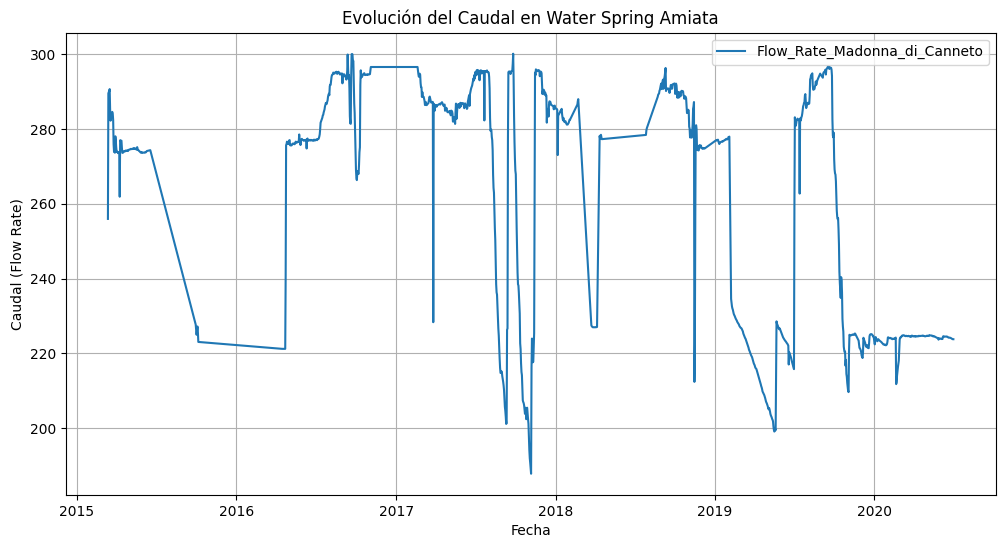

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Water_Spring_Madonna_di_Canneto.csv"
df = pd.read_csv(file_path)

# Convertir la columna de fecha a formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d/%m/%Y')

# Identificar columnas de caudal (Flow Rate)
flow_rate_cols = [col for col in df.columns if "Flow_Rate" in col]

# Verificar si hay columnas de caudal
if not flow_rate_cols:
    print("No se encontraron columnas de caudal en el archivo.")
else:
    # Graficar cada caudal
    plt.figure(figsize=(12, 6))
    for col in flow_rate_cols:
        sns.lineplot(x=df['Date'], y=df[col], label=col)

    plt.xlabel("Fecha")
    plt.ylabel("Caudal (Flow Rate)")
    plt.title("Evolución del Caudal en Water Spring Amiata")
    plt.legend()
    plt.grid()
    plt.show()

<ipython-input-7-7ff11e086422>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
<ipython-input-7-7ff11e086422>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
<ipython-input-7-7ff11e086422>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')


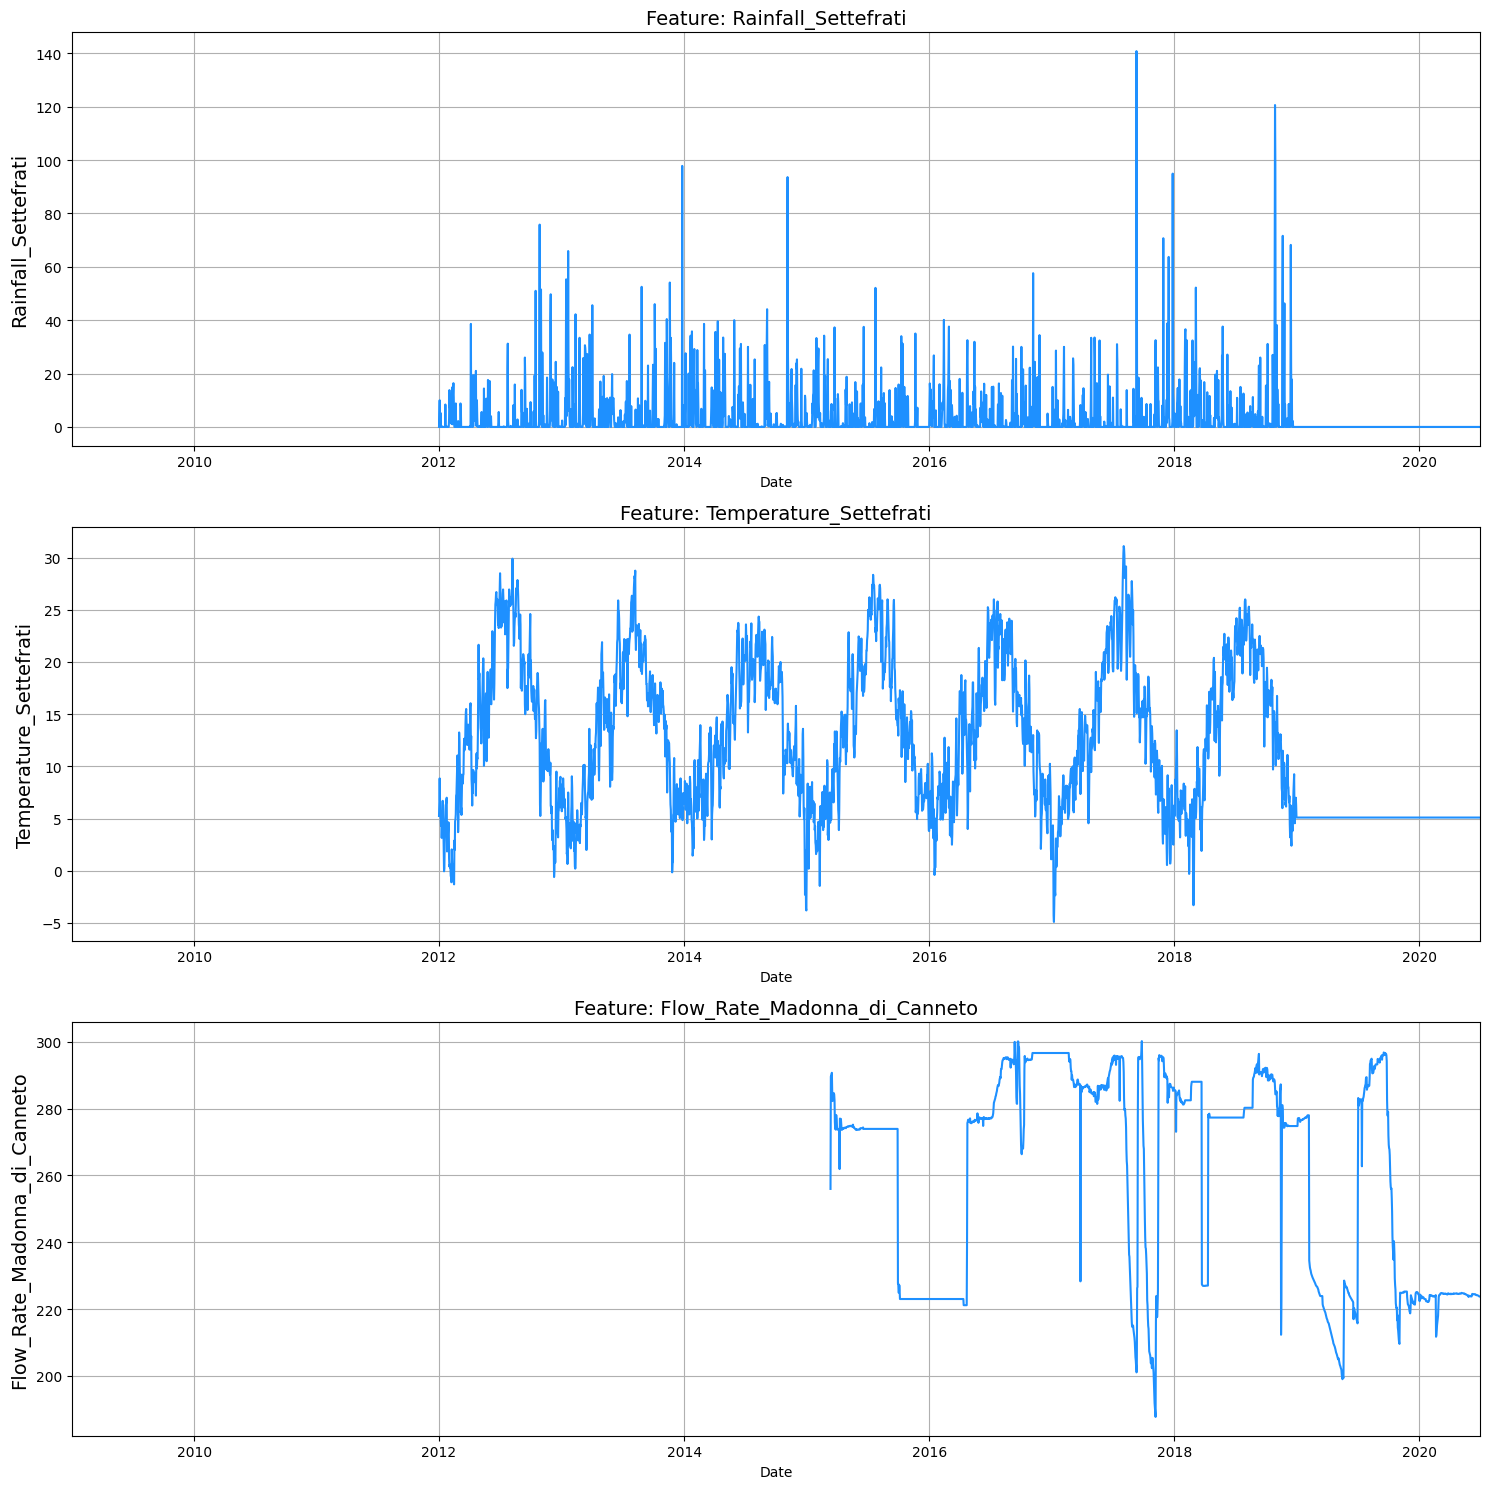

In [ ]:
#Para tener una visualización más completa, voy a plotearme todas las variables que
#aparezcan en este último csv iterando sobre cada columna (excepto date)

num_features = len(df.columns) - 1
fig, ax = plt.subplots(nrows=num_features, ncols=1, figsize=(15, 5 * num_features))

# Si solo hay una variable, ax no será una lista, lo convertimos en una lista
if num_features == 1:
    ax = [ax]
for i, column in enumerate(df.drop('Date', axis=1).columns):
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title(f'Feature: {column}', fontsize=14)
    ax[i].set_ylabel(column, fontsize=14)
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
    ax[i].grid()

plt.tight_layout()
plt.show()

In [2]:
#Estando familiarizado con el aspecto que tienen cada uno de los datos de los cuerpos
#de agua, puedo pasar ya a limpiar los NaN

import pandas as pd
import numpy as np
import glob
#Glob es para leer varios archivos

files = [
    "Aquifer_Auser.csv", "Aquifer_Doganella.csv", "Aquifer_Luco.csv", "Aquifer_Petrignano.csv",
    "Water_Spring_Amiata.csv", "Water_Spring_Lupa.csv", "Water_Spring_Madonna_di_Canneto.csv"
]


for file in files:
    try:
        df = pd.read_csv(file, parse_dates=['Date'], dayfirst=True)

        #En este caso voy a reemplazar con interpolación lineal
        df.interpolate(method='linear', inplace=True)

        # Aplicar forward-fill para los NaN restantes
        df.fillna(method='ffill', inplace=True)

        # Guardar el archivo procesado
        df.to_csv(f"cleaned_{file}", index=False)
        print(f"✔ {file} procesado y guardado como cleaned_{file}")

    except Exception as e:
        print(f"⚠ Error procesando {file}: {e}")


⚠ Error procesando Aquifer_Auser.csv: [Errno 2] No such file or directory: 'Aquifer_Auser.csv'
⚠ Error procesando Aquifer_Doganella.csv: [Errno 2] No such file or directory: 'Aquifer_Doganella.csv'
⚠ Error procesando Aquifer_Luco.csv: [Errno 2] No such file or directory: 'Aquifer_Luco.csv'
⚠ Error procesando Aquifer_Petrignano.csv: [Errno 2] No such file or directory: 'Aquifer_Petrignano.csv'
⚠ Error procesando Water_Spring_Amiata.csv: [Errno 2] No such file or directory: 'Water_Spring_Amiata.csv'
⚠ Error procesando Water_Spring_Lupa.csv: [Errno 2] No such file or directory: 'Water_Spring_Lupa.csv'
⚠ Error procesando Water_Spring_Madonna_di_Canneto.csv: [Errno 2] No such file or directory: 'Water_Spring_Madonna_di_Canneto.csv'


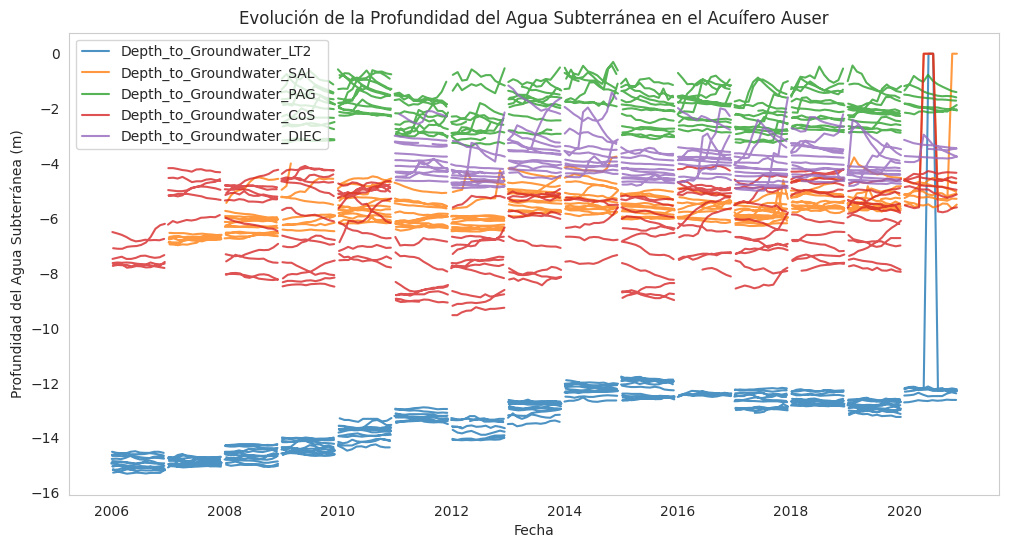

In [4]:
#Ahora hay que descomponer las series temporales. En este caso la estacionalidad creo
#que será el factor más distintivo. La más razonable es la anual, porque las tendencias
#mensuales suelen ser más "humanas" que naturales, y en cualquier caso van a acompañar
#más a las estaciones del año, ciclos de riego etc que a inicio/final de mes (si lo
#hacen, no será sistemáticamente cada mes, sino, de nuevo, con tendencia anual)

#En este caso voy a elegir Auser como acuífero. Estaría bien analizar cualquiera de
#las variables Depth_to_Groundwater, pero como hay bastantes, las ploteo antes de
#decidir para ver si hay alguna que tenga más sentido

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = "Aquifer_Auser.csv"  # Ajusta el nombre si es otro archivo
df = pd.read_csv(file_path)

# Convertir la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filtrar solo las columnas de profundidad
depth_cols = [
    "Depth_to_Groundwater_LT2",
    "Depth_to_Groundwater_SAL",
    "Depth_to_Groundwater_PAG",
    "Depth_to_Groundwater_CoS",
    "Depth_to_Groundwater_DIEC"
]

# Crear el gráfico
plt.figure(figsize=(12, 6))
for col in depth_cols:
    if col in df.columns:
        plt.plot(df['Date'], df[col], label=col, alpha=0.8)

plt.xlabel("Fecha")
plt.ylabel("Profundidad del Agua Subterránea (m)")
plt.title("Evolución de la Profundidad del Agua Subterránea en el Acuífero Auser")
plt.legend()
plt.grid()
plt.show()



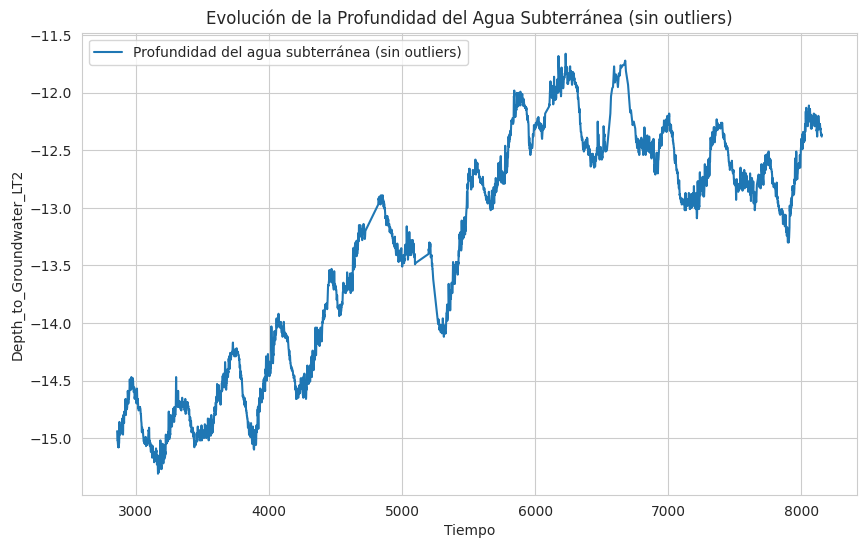

In [5]:
# Eliminar outliers donde los valores son mayores a -10
df_cleaned = df[df['Depth_to_Groundwater_LT2'] <= -10]

# Verifica que los outliers se han eliminado
df_cleaned.head()

# Visualiza la nueva serie sin outliers
plt.figure(figsize=(10,6))
plt.plot(df_cleaned['Depth_to_Groundwater_LT2'], label='Profundidad del agua subterránea (sin outliers)')
plt.title('Evolución de la Profundidad del Agua Subterránea (sin outliers)')
plt.xlabel('Tiempo')
plt.ylabel('Depth_to_Groundwater_LT2')
plt.legend()
plt.show()


Error en la conversión de la fecha: 'Date'


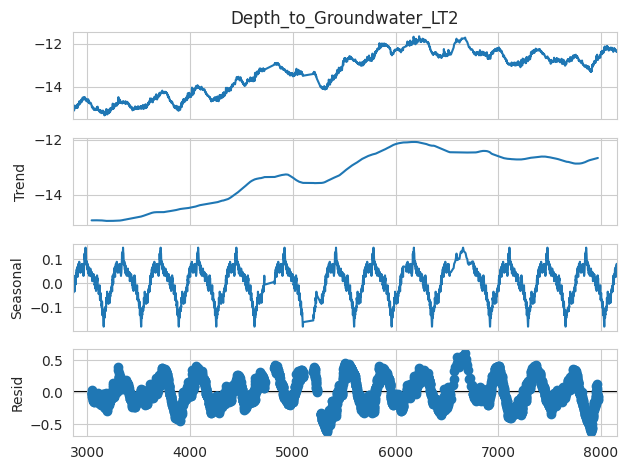

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
try:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.set_index('Date', inplace=True)
except Exception as e:
    print(f"Error en la conversión de la fecha: {e}")

#Ahora ya sí pasamos a la descomposición
result = seasonal_decompose(df_cleaned['Depth_to_Groundwater_LT2'], model='additive', period=365)

#Y lo ploteo
result.plot()
plt.show()



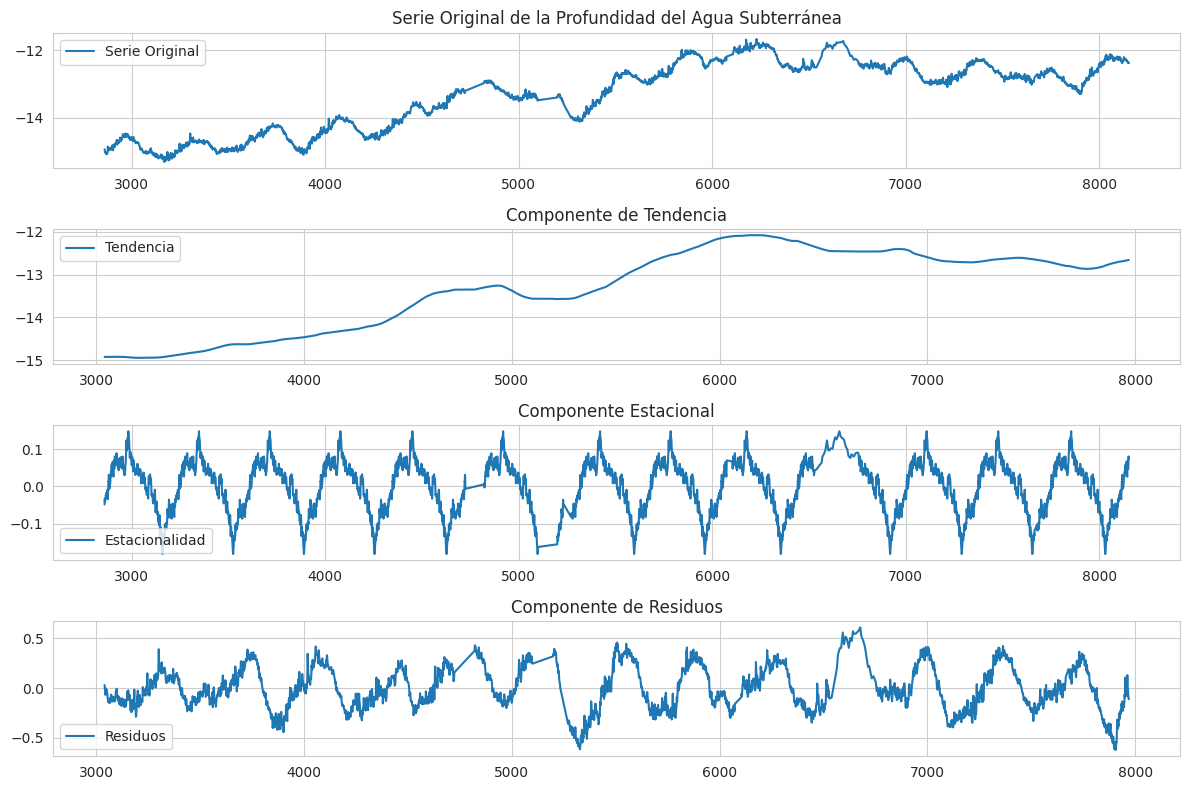

In [28]:
#Ahora extraigo los valores descompuestos
trend = result.trend
seasonal = result.seasonal
residual = result.resid

#Y los ploteo
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_cleaned['Depth_to_Groundwater_LT2'], label='Serie Original')
plt.title('Serie Original de la Profundidad del Agua Subterránea')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Tendencia')
plt.title('Componente de Tendencia')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Estacionalidad')
plt.title('Componente Estacional')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuos')
plt.title('Componente de Residuos')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# Cargar y preparar
df = pd.read_csv("Aquifer_Auser.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

# Filtrar columnas de profundidad
depth_cols = [col for col in df.columns if "Depth_to_Groundwater" in col]

# Reemplazar valores mayores a -10 por NaN
for col in depth_cols:
    df[col] = df[col].apply(lambda x: x if x <= -10 else None)

# Opcional: Ver cuántos valores han sido eliminados por columna
for col in depth_cols:
    print(f"{col}: {df[col].isna().sum()} valores eliminados")

# Guardar limpio (opcional)
# df.to_csv("Aquifer_Auser_clean.csv")


Depth_to_Groundwater_LT2: 3354 valores eliminados
Depth_to_Groundwater_SAL: 8154 valores eliminados
Depth_to_Groundwater_PAG: 8154 valores eliminados
Depth_to_Groundwater_CoS: 8154 valores eliminados
Depth_to_Groundwater_DIEC: 8154 valores eliminados


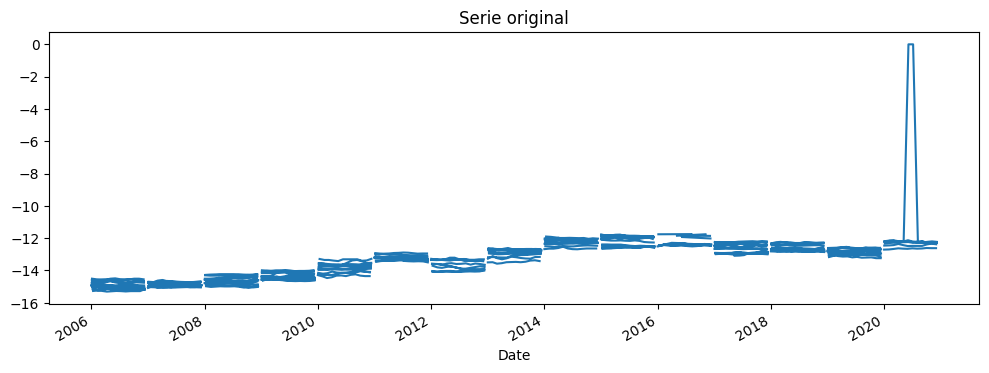

In [13]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

#Cada vez que se reinicia la sesión pierdo los datos que necesito, por lo que voy a
#dejar en una sola celda de código las líneas en las que limpio estos últimos outliers
#(en la siguente celda)
df = pd.read_csv("Aquifer_Auser.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)
series = df['Depth_to_Groundwater_LT2'].dropna()

#Ploteo para mostrar el estado actual
series.plot(figsize=(12, 4), title="Serie original")
plt.show()

<ipython-input-22-f1068e498a46>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[target_col] = df[target_col].fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmo

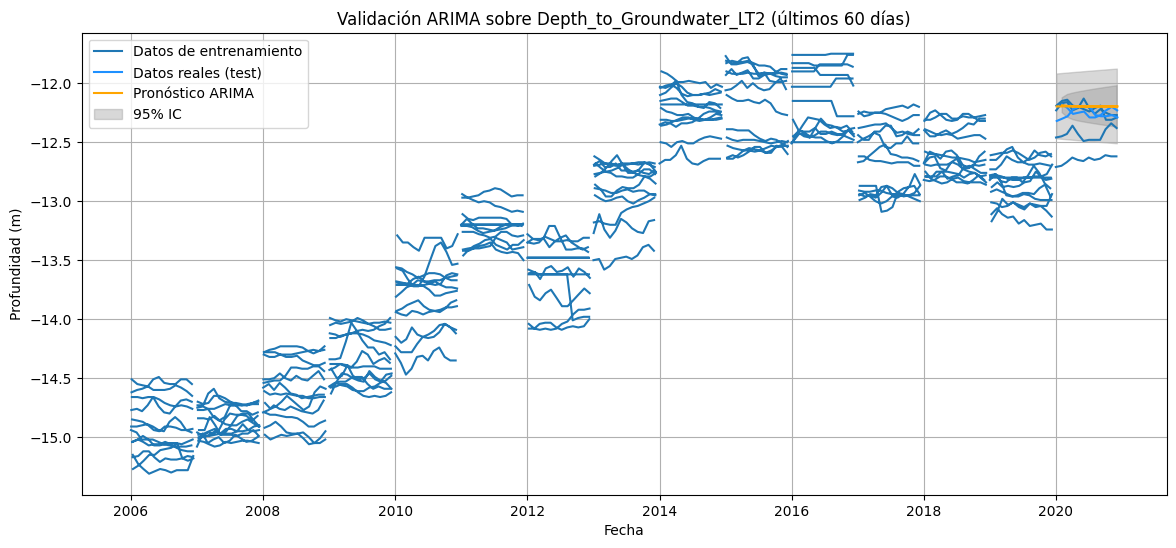

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv("Aquifer_Auser.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

depth_cols = [col for col in df.columns if "Depth_to_Groundwater" in col]
target_col = depth_cols[0]

#Limpio directamente los outliers aquí para no crear más archivos que desaparecerán
#al cerrar la sesión
df[target_col] = df[target_col].apply(lambda x: x if x <= -10 else None)
df[target_col] = df[target_col].fillna(method='ffill')

#Separo en train y test, quitándole los últimos 60 días para ver qué tal los predice
#sin tenerlos
n_forecast = 60
serie = df[target_col].dropna()
train = serie[:-n_forecast]
test = serie[-n_forecast:]

#Entreno el ARIMA
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

#Y le pido el forecast para los días que no le he dado, usando las fechas reales
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()
forecast_index = test.index

#Ploteo todo
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Datos de entrenamiento')
plt.plot(test.index, test, label='Datos reales (test)', color='dodgerblue')
plt.plot(forecast_index, forecast_values, label='Pronóstico ARIMA', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='gray', alpha=0.3, label='95% IC')
plt.title(f'Validación ARIMA sobre {target_col} (últimos {n_forecast} días)')
plt.xlabel('Fecha')
plt.ylabel('Profundidad (m)')
plt.legend()
plt.grid()
plt.show()

#Como podemos ver, la predicción es bastante correcta. En gris nos marca el área en
#donde cree que se encontrarán los valores con un 95% de confianza.
#La tendencia general está bien reflejada, y la gran mayoría caen entro de ese intervalo
#de confianza, que es lo que se espera.
#También es cierto que tras la limpieza de datos, el comportamiento es relativamente
#estacionario y los cambios que tiene son graduales, lo cual imagino que le facilita al
#modelo identificar la tendencia